In [5]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')

# def sizeof_fmt(num, suffix='B'):
#     ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
#     for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
#         if abs(num) < 1024.0:
#             return "%3.1f %s%s" % (num, unit, suffix)
#         num /= 1024.0
#     return "%.1f %s%s" % (num, 'Yi', suffix)

# for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
#                          key= lambda x: -x[1])[:10]:
#     print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

In [6]:
"""On memory management."""
# https://realpython.com/python-memory-management/
# https://medium.com/@tyastropheus/tricky-python-i-memory-management-for-mutable-immutable-objects-21507d1e5b95
# http://foobarnbaz.com/2012/07/08/understanding-python-variables/

'On memory management.'

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.2_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.01831, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
tiger-h19c2n6.28240Exhausted 1048576 MQ irecv request descriptors, which usually indicates a user program error or insufficient request descriptors (PSM2_MQ_RECVREQS_MAX=1048576)
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 7188585.0 ON tiger-h19c2n6 CANCELLED AT 2021-09-21T01:12:00 DUE TO TIME LIMIT ***
[warn] Epoll ADD(4) on fd 42 failed.  Old events were 0; read change was 0 (none); write change 

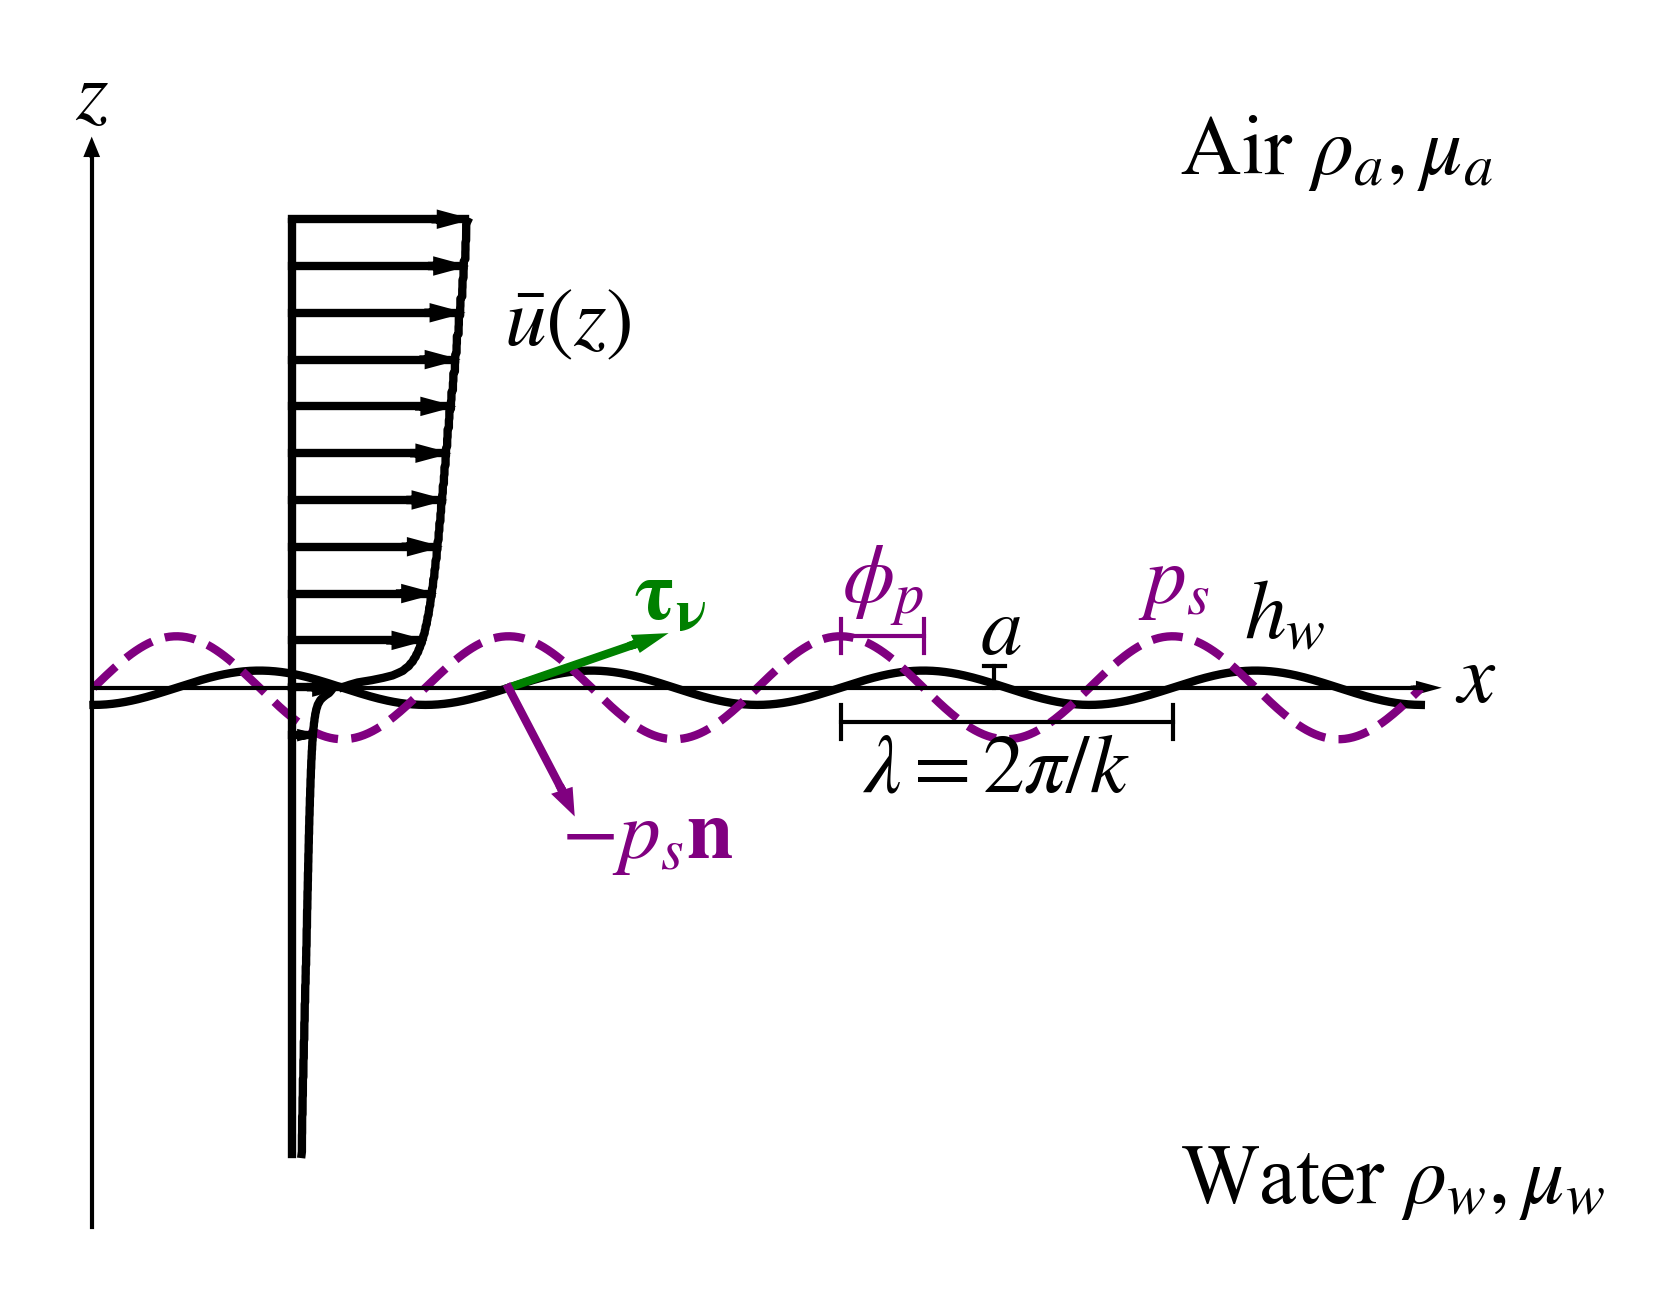

In [11]:
from defs import Case, Interface2D
from prepare import load_object, save_object
# Sketch of the simulation setup
fig = plt.figure(figsize=[3,2.5]); ax = fig.gca()

case1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.2, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case1.tstart = 57
version = '_tiger'
picklename = case1.path + 'case_main' + version + '.pkl'
case1 = load_object(picklename)
case = case1
case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
case.uxmean = np.average(case.ux_2D, axis=(1))

# Plot the wave shape
x = np.arange(-np.pi, np.pi, 0.01)
eta = (0.4/4)*np.cos(4*x+np.pi)
plt.plot(x, eta, color='k', lw=1); 
p = (0.3)*np.cos(4*x+np.pi+np.pi/2)
plt.plot(x, p, '--', color='purple', lw=1); 
ax.set_xlim((-3.3,3.3)); ax.set_ylim(-3.3, 3.3)
# ax.set_xticks([]); ax.set_yticks([])
ax.axis('off')

# Plot log profile (wind)
y = (case.yarray[82:-1:2]-1)/1.8
u = np.ones(np.shape(y))*(-2.2)
plt.plot(u[0:200], y[0:200], c='k', lw=1) 
u = np.average(case.uxmean, axis=0)[82:-1:2]/8 - 2
plt.plot(u[0:200], y[0:200], c='k', lw=1) 

"""For later use
Next time just load the log profile"""
# picklename = 'log_data.pkl'
# save_object((y,u), picklename)

sample = np.arange(0, np.size(y), 20)
for i in sample:
    yp = np.ones(100)*y[i]
    umax = u[i]
    up = np.linspace(-2.2,umax-0.01,100)
    ax.plot(up,yp,color='k',lw=1)
    ax.arrow(umax-0.15, yp[0], 0.1, 0, shape='full', lw=1, color='k', length_includes_head=True, head_width=.05)

# Plot profile (water)
y = -(case.yarray[82:-1:2]-1)/1.8
u = np.ones(np.shape(y))*(-2.2)
plt.plot(u[0:200], y[0:200], c='k', lw=1) 
u = -np.average(case.uxmean, axis=0)[82:-1:2]/32 - 2
plt.plot(u[0:200], y[0:200], c='k', lw=1) 
sample = np.arange(20, np.size(y), 20)
for i in sample[0:1]:
    yp = np.ones(100)*y[i]
    umax = u[i]
    up = np.linspace(-2.2,umax-0.01,100)
    ax.plot(up,yp,color='k',lw=1)
    ax.arrow(umax-0.05, yp[0], 0.01, 0, shape='full', lw=1, color='k', length_includes_head=True, head_width=.01)

# Add coordinate
y = np.ones(100)*0.
u = np.linspace(-np.pi,np.pi,100)
ax.plot(u,y,color='k',lw=0.5)
ax.arrow(3.1, 0, 0.1, 0, shape='full', lw=0.5, color='k', length_includes_head=True, head_width=.05)
ax.text(3.3,-0.08, r'$x$')
y = np.linspace(-np.pi,np.pi,100)
u = np.ones(100)*(-3.15)
ax.plot(u,y,color='k',lw=0.5)
ax.arrow(-3.15, 3.1, 0, 0.08, shape='full', lw=0.5, color='k', length_includes_head=True, head_width=.05)
ax.text(-3.23, 3.32, r'$z$')

# Add texts
ax.text(2.3, 0.3, r'$h_w$')
ax.text(1.8, 0.5, r'$p_s$', color='purple')
ax.text(-1.2, 2, r'$\bar{u}(z)$')
# ax.text(0.1,0.05, r'$\sigma$', fontsize=12)
ax.text(2,-3, r'Water $\rho_w, \mu_w$')
ax.text(2,3, r'Air $\rho_a, \mu_a$')
# fig.savefig(working_dir+'plots/sketch_withcoord.pdf', bbox_inches='tight', pad_inches=0.1)

# Demo wave length
u = np.linspace(np.pi/8,np.pi*5/8,100)
y = np.ones(100)*(-0.2)
ax.plot(u,y,color='k',lw=0.5)
u = np.ones(20)*(np.pi/8)
y = np.linspace(-0.3,-0.1,20)
ax.plot(u,y,color='k',lw=0.5)
u = np.ones(20)*(np.pi*5/8)
y = np.linspace(-0.3,-0.1,20)
ax.plot(u,y,color='k',lw=0.5)
ax.text(np.pi/8+0.1, -0.6, r'$\lambda = 2\pi/k$')

# Demo amplitude
y = np.ones(20)*(0.5/4)
u = np.linspace(-0.5+np.pi/2,-0.4+np.pi/2,20)
ax.plot(u,y,color='k',lw=0.5)
u = np.ones(20)*(-0.45+np.pi/2)
y = np.linspace(0,0.5/4,20)
ax.plot(u,y,color='k',lw=0.5)
ax.text(-0.52+np.pi/2, 0.8/4, r'$a$')

# Demo phi_p
u = np.linspace(np.pi/8,np.pi/4,100)
y = np.ones(100)*(0.3)
ax.plot(u,y,color='purple',lw=0.5)
u = np.ones(20)*(np.pi/8)
y = np.linspace(0.2,0.4,20)
ax.plot(u,y,color='purple',lw=0.5)
u = np.ones(20)*(np.pi/4)
y = np.linspace(0.2,0.4,20)
ax.plot(u,y,color='purple',lw=0.5)
ax.text(0.4, 0.5, r'$\phi_p$',color='purple')

# tau
u = np.linspace(-np.pi*3/8,-np.pi*1.5/8,100)
y = np.linspace(0,0.25,100)
ax.arrow(-np.pi*1.5/8, 0.25, 0.1, 0.04, shape='full', lw=1, color='green', length_includes_head=True, head_width=.05)
ax.plot(u,y,color='green',lw=1)
ax.text(-np.pi*1.5/8, 0.4, r'$\mathbf{\tau_{\nu}}$',color='green')

# p 
u = np.linspace(-np.pi*3/8,-np.pi*3/8+0.25,100)
y = np.linspace(0,-np.pi*1.5/8,100)
ax.arrow(-np.pi*3/8+0.25, -np.pi*1.5/8, 0.04, -0.1, shape='full', lw=1, color='purple', length_includes_head=True, head_width=.05)
ax.plot(u,y,color='purple',lw=1)
ax.text(-np.pi*3/8+0.25, -np.pi*1.5/8-0.4, r'$-p_s\mathbf{n}$', color='purple')

plt.show()

fig.savefig('./figures_jfm/diagram2.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('./figures_jfm/diagram2.eps', bbox_inches='tight', pad_inches=0.1)

Text(-0.9280972450961724, -0.9890486225480862, '$-p\\mathbf{n}$')

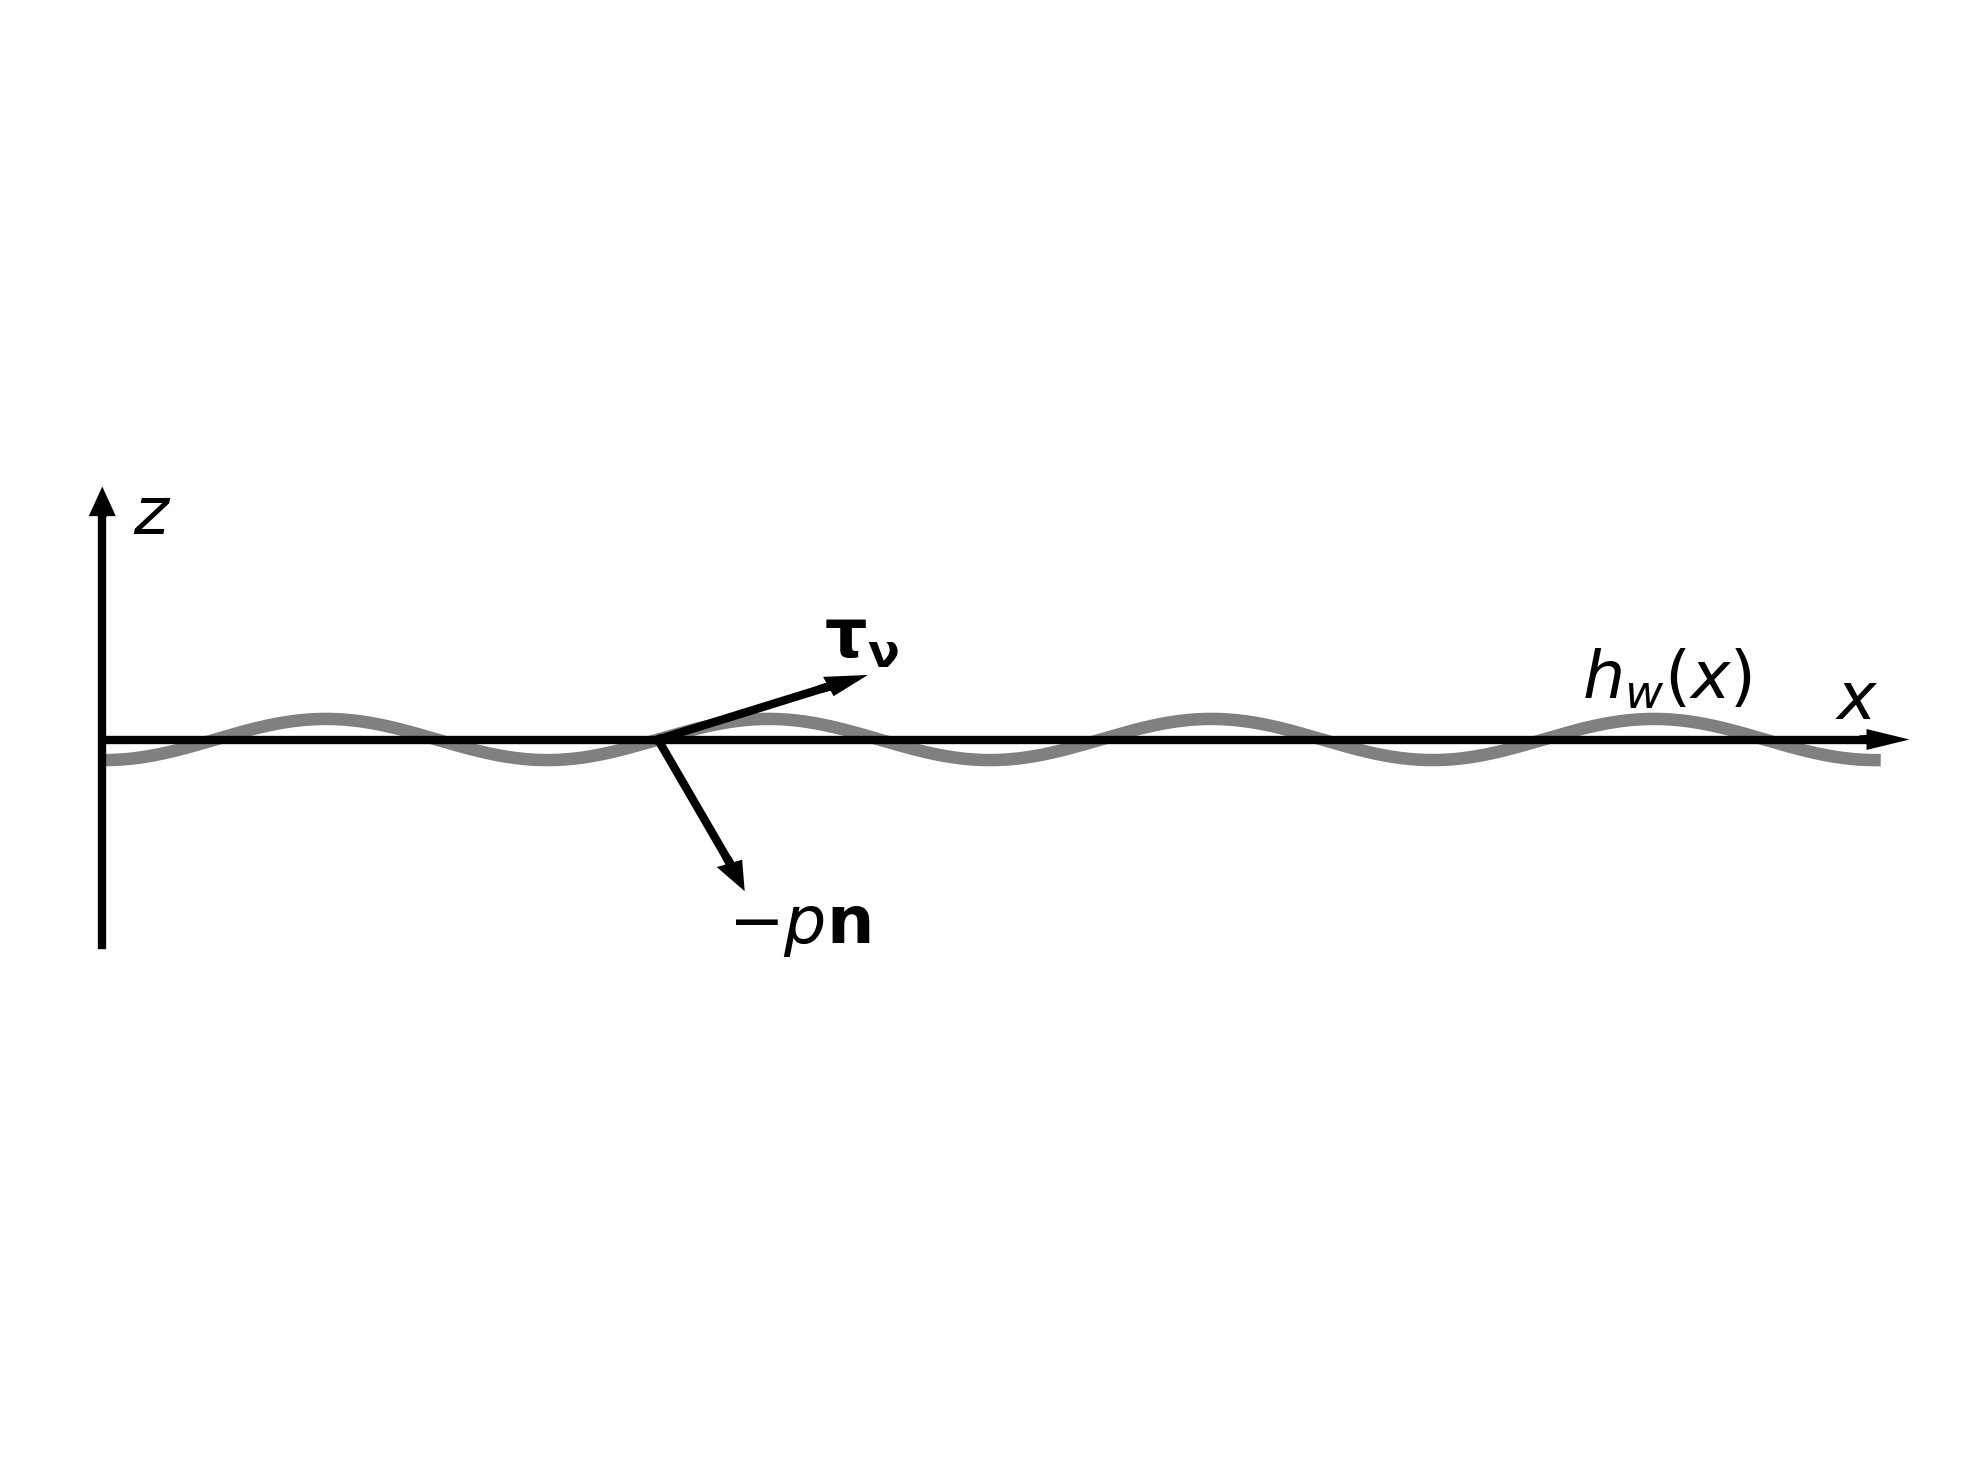

In [13]:
# Sketch of the simulation setup
fig = plt.figure(figsize=[4,3]); ax = fig.gca()

# Plot the wave shape
x = np.arange(-np.pi, np.pi, 0.01)
eta = (0.4/4)*np.cos(4*x+np.pi)
plt.plot(x,eta, color='gray'); 
ax.set_xlim((-3.3,3.3)); ax.set_ylim(-3.3, 3.3)
# ax.set_xticks([]); ax.set_yticks([])
ax.axis('off')
ax.text(2.1,0.2, r'$h_w(x)$')

# Add coordinate
y = np.ones(100)*0.
u = np.linspace(-np.pi,np.pi,100)
ax.plot(u,y,color='k',lw=1)
ax.arrow(3.1, 0, 0.1, 0, shape='full', lw=1, color='k', length_includes_head=True, head_width=.05)
ax.text(3,0.1, r'$x$')
y = np.linspace(-1,1.1,100)
u = np.ones(100)*(-3.15)
ax.plot(u,y,color='k',lw=1)
ax.arrow(-3.15, 1.1, 0, 0.08, shape='full', lw=1, color='k', length_includes_head=True, head_width=.05)
ax.text(-3.04, 1, r'$z$')

# tau
u = np.linspace(-np.pi*3/8,-np.pi*1.5/8,100)
y = np.linspace(0,0.25,100)
ax.arrow(-np.pi*1.5/8, 0.25, 0.1, 0.04, shape='full', lw=1, color='k', length_includes_head=True, head_width=.05)
ax.plot(u,y,color='k',lw=1)
ax.text(-np.pi*1.5/8, 0.4, r'$\mathbf{\tau_{\nu}}$')

# p 
u = np.linspace(-np.pi*3/8,-np.pi*3/8+0.25,100)
y = np.linspace(0,-np.pi*1.5/8,100)
ax.arrow(-np.pi*3/8+0.25, -np.pi*1.5/8, 0.04, -0.1, shape='full', lw=1, color='k', length_includes_head=True, head_width=.05)
ax.plot(u,y,color='k',lw=1)
ax.text(-np.pi*3/8+0.25, -np.pi*1.5/8-0.4, r'$-p\mathbf{n}$')
# fig.savefig('/home/jiarong/Downloads/ResearchDay/stress_diagram.pdf')

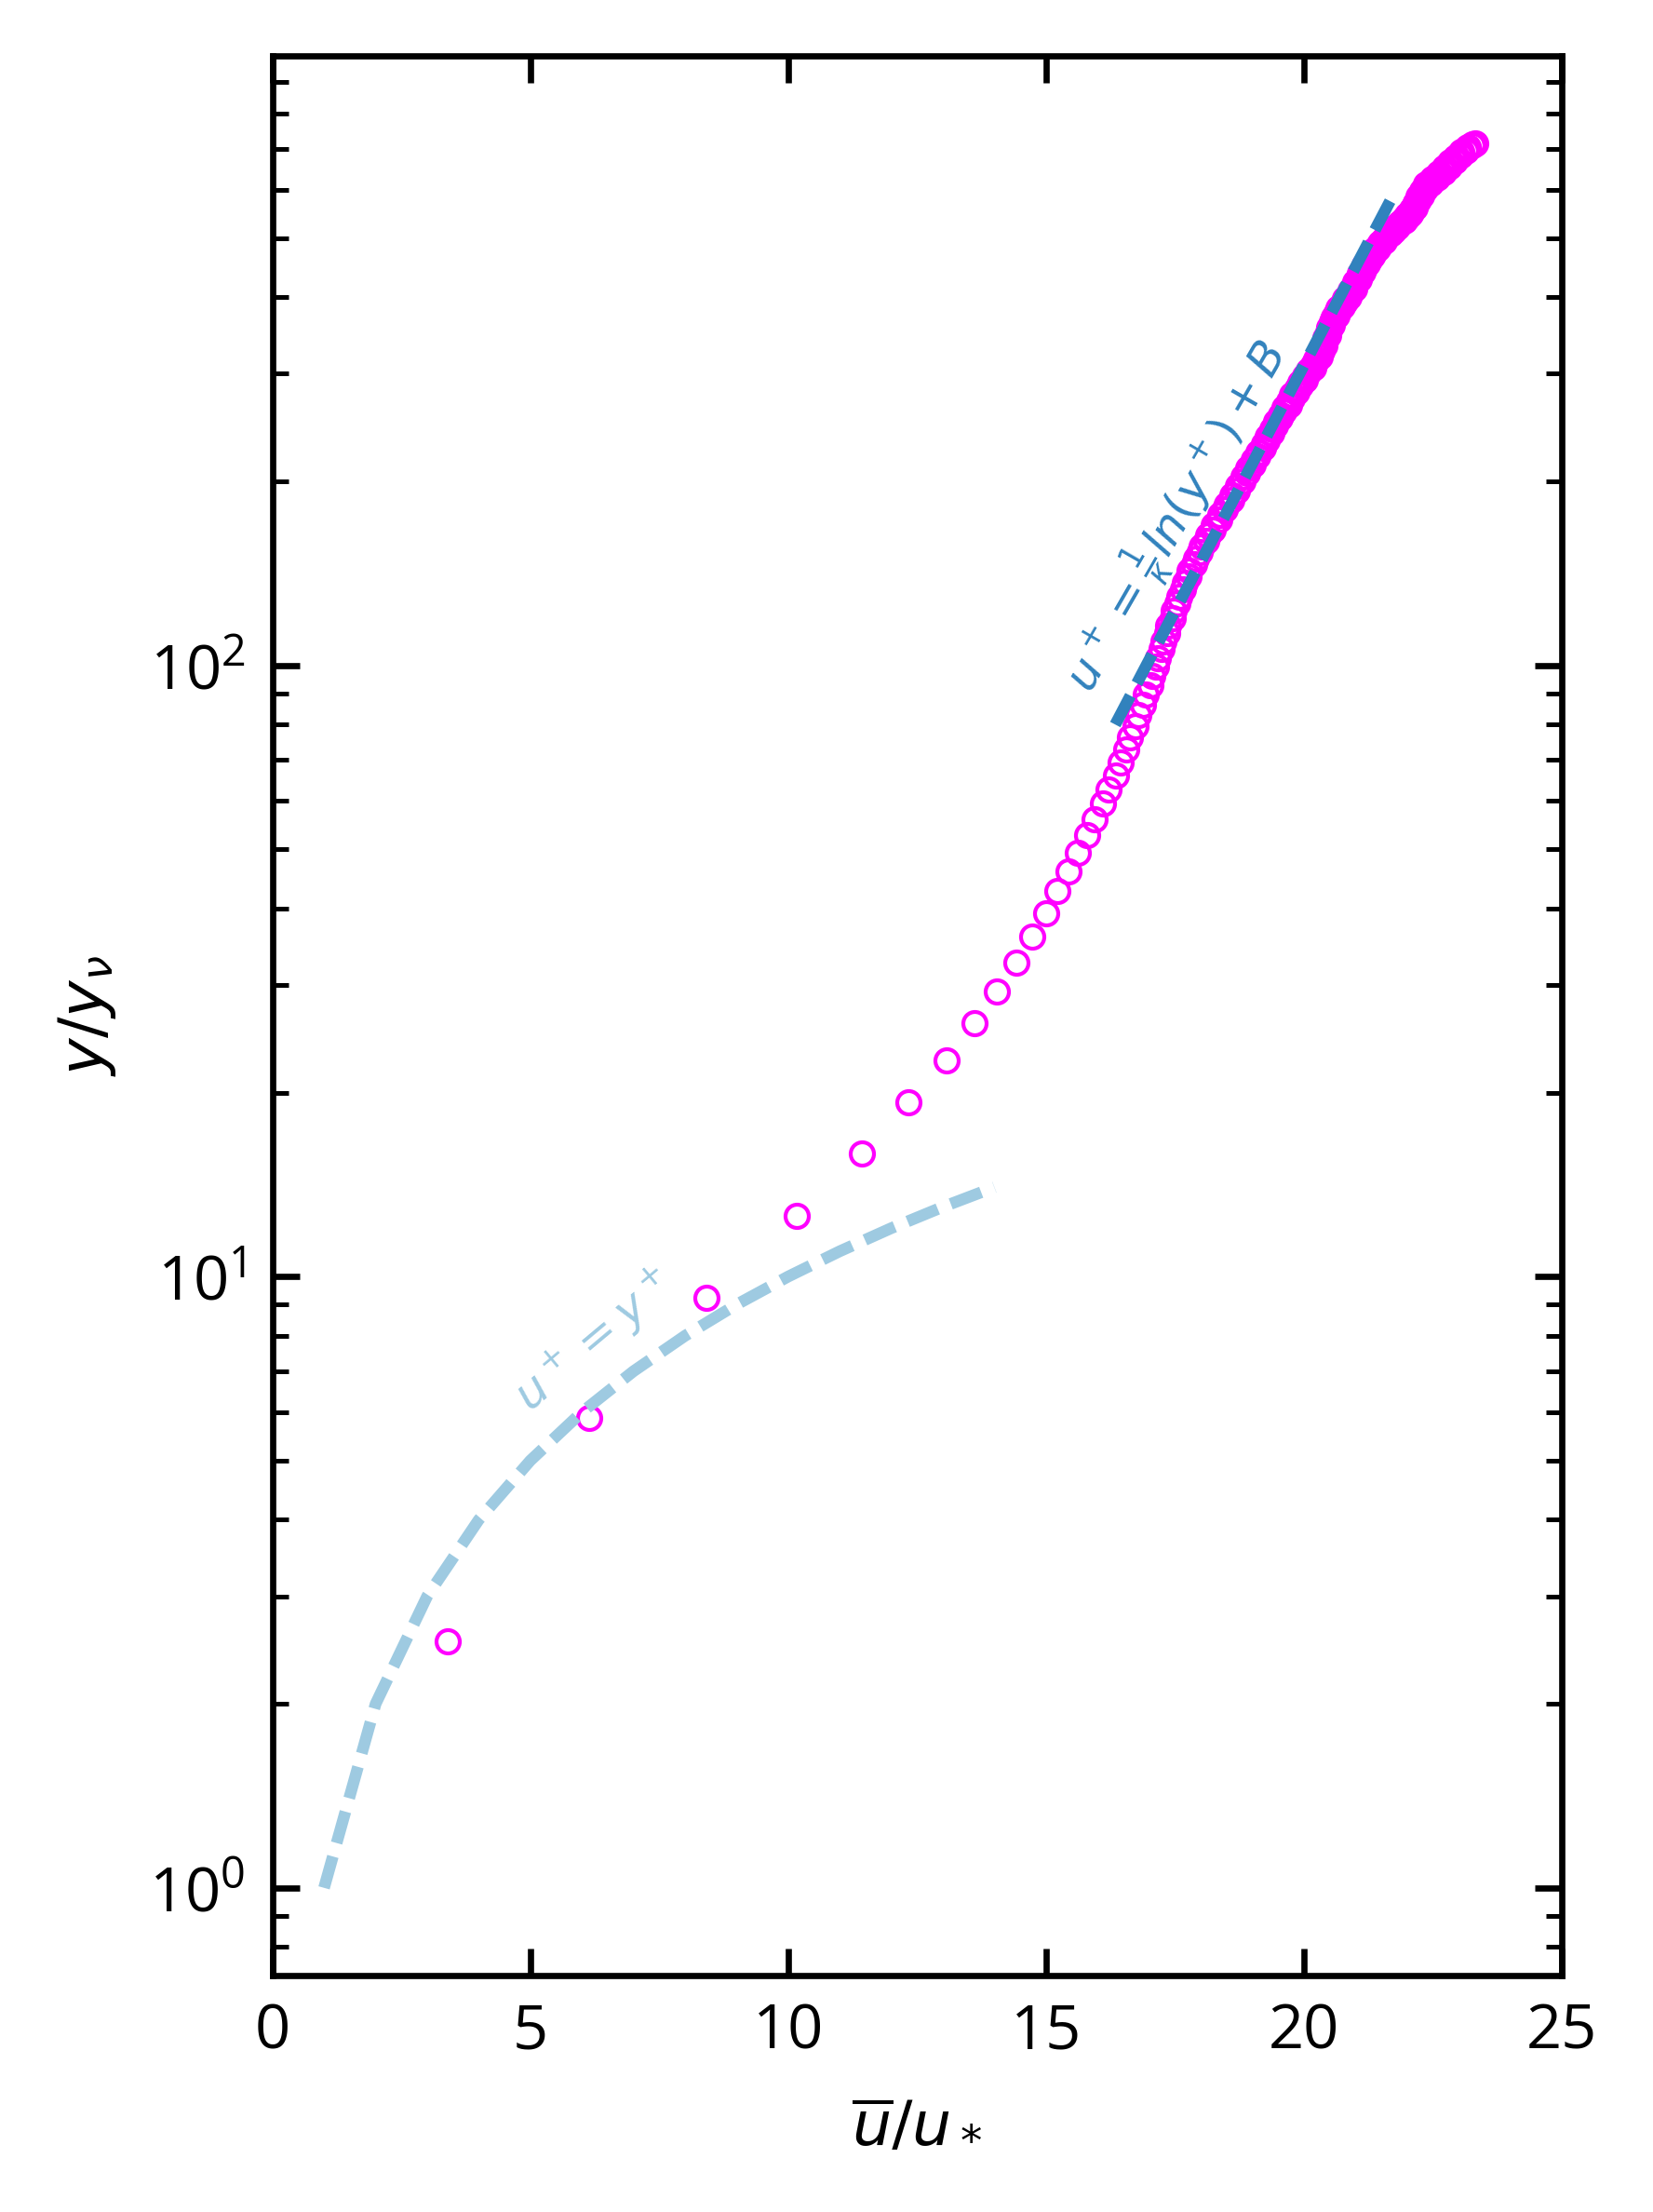

In [96]:
fig = plt.figure(figsize=[3,4]); ax = plt.gca()
case = case_pre5
ytau = (2*np.pi-1)/case.Retau
for i in range(0,12):
    case.yarray = np.linspace(0,case.L0,case.N,endpoint=False)+case.L0/2**case.N/2 # Centered grid for interpolation
#     plt.plot((case.yarray[31:-1:2]-1)/ytau, case.uxmean[i][31:-1:2]/case.ustar, '.', 
#              color=plt.cm.get_cmap('summer')(1-i/12))
plt.plot(np.average(case.uxmean, axis=0)[31:-1:2]/case.ustar, (case.yarray[31:-1:2]-1)/ytau,
         marker = 'o', mfc='none', markeredgewidth=0.5, markersize=3, linewidth=0,
         label = r'$ak=%g, LEVEL=%g, u_e=%gu_*$' %(case.ak,case.LEVEL,case.emax), color='magenta') 
y = np.arange(1,15)
plt.plot(y, y, '--', color=plt.get_cmap('tab20c')(2))
y = np.arange(80,600)
plt.plot(1/0.37*np.log(y)+4.5, y, '--', color=plt.get_cmap('tab20c')(0))
# plt.plot(y, 1/0.41*np.log(y)+6, color=plt.get_cmap('tab20c')(0))
ax.text(0.25, 0.33, r'$u^+=y^+$', ha='center', va='center', rotation=40., fontsize=6, 
        color=plt.get_cmap('tab20c')(2), transform=ax.transAxes)
ax.text(0.7, 0.76, r'$u^+=\frac{1}{\kappa} ln(y^+)+B$', ha='center', va='center', rotation=60, fontsize=6,
        color=plt.get_cmap('tab20c')(0), transform=ax.transAxes)
plt.yscale('log')
plt.xlim([0, 25])
# plt.xlim([1, 800])
plt.xlabel(r'$\overline{u}/u_*$') 
plt.ylabel(r'$y/y_{\nu}$') 
# fig.savefig('/home/jiarong/Downloads/ResearchDay/log_profile.pdf')

(2376, 1776, 4)


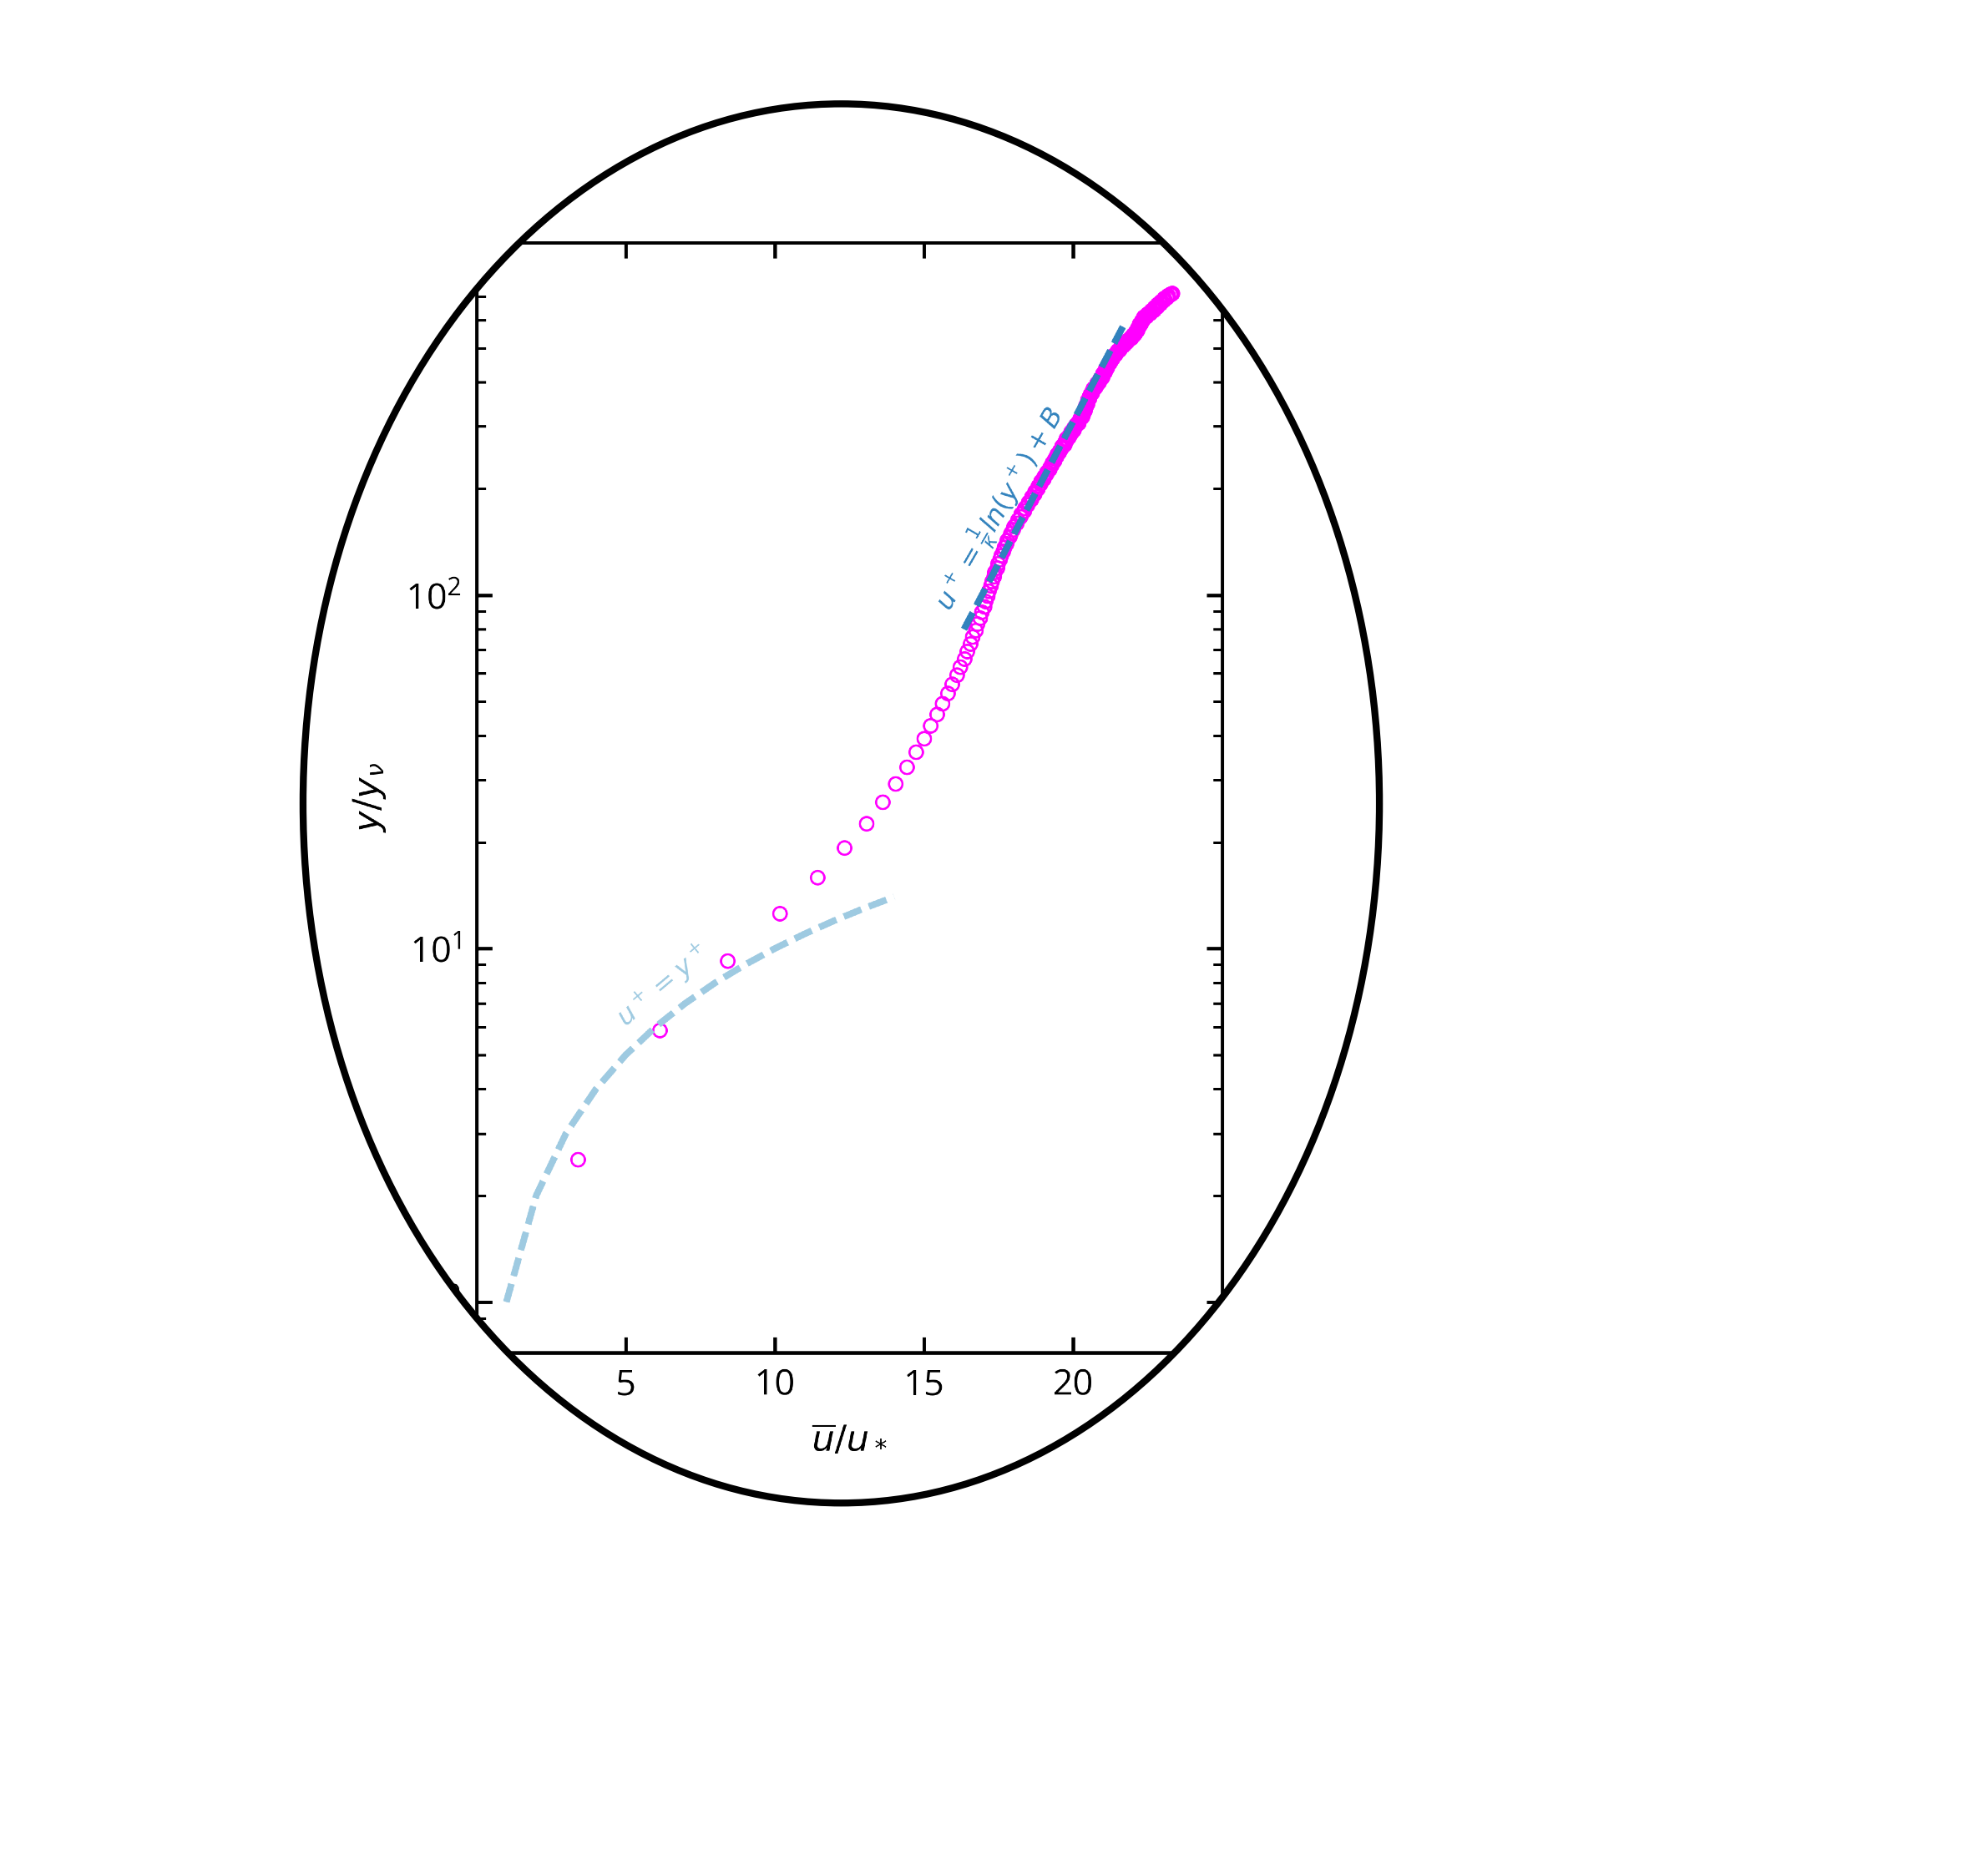

In [260]:
import matplotlib.patches as patches
# import matplotlib.cbook as cbook
import matplotlib.image as mpimg

image = mpimg.imread('/home/jiarong/Downloads/ResearchDay/log_profile.png')
print(np.shape(image))

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Ellipse((970, 1100), 2000, 2600, transform=ax.transData, fill=False)
im.set_clip_path(patch)
# ax.set_aspect(1)
ax.add_artist(patch)
plt.xlim([-500,3000]); plt.ylim([3000, -300])
ax.axis('off')
fig.savefig('/home/jiarong/Downloads/ResearchDay/log_profile_withcircle_white.png')